In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
import math
from sklearn.metrics import accuracy_score

## Генерация выборки

In [57]:
X, y = make_blobs(n_samples=50, centers=2, random_state=42, cluster_std=0.1)

## Сгенерированные точки

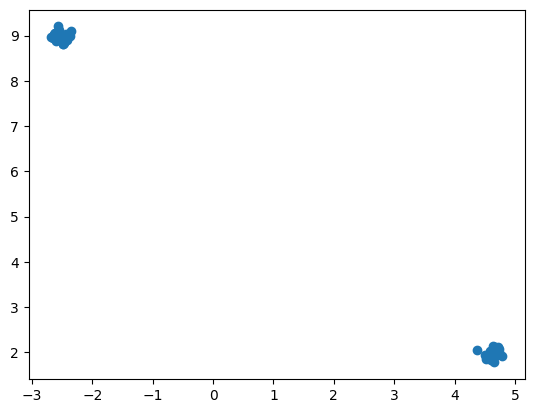

In [58]:
plt.scatter(X[:, 0], X[:, 1])

In [59]:
def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [60]:
mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[-2.53316572,  8.9825378 ],
       [ 4.62510186,  1.98008378]])

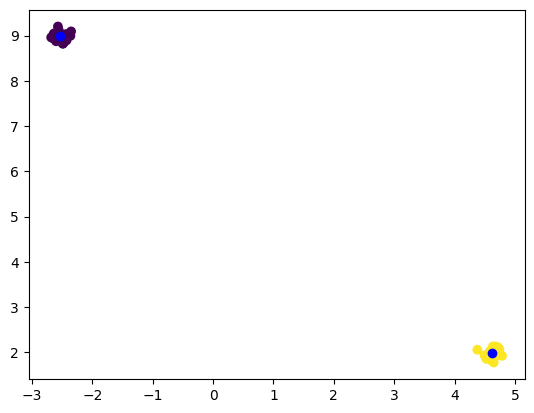

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='blue')

In [62]:
class SOM:
    def __init__(self, n, c):
        """
        n - количестов атрибутов
        C - количество кластеров
        """
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        """
        Вычисление значение шага относительного текущего выбора
        """
        return (50 - i) / 100

    def winner(self, weights, sample):
        """
        Вычисляем выигравший нейрон (вектор) по Евклидову расстоянию
        """
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        """
        Обновляем значение для выигравшего нейрона
        """
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + 0.5 * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [63]:
# Обучающая выборка (m, n)
# m - объем выборки
# n - количество атрибутов в записи
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

# Обучающие веса (n, C)
# n - количество атрибутов в записи
# C - количество кластеров
C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[1.14414832, 1.07749483],
       [1.02630994, 1.15592302]])

In [64]:
som = SOM(n, C)
som

In [65]:
for j in range(100):
    for i in range(m):
        sample = T[i]
        J = som.winner(weights, sample)
        weights = som.update(weights, sample, J)


Шаг для 1 кластера = 0.5
Веса после обновления:
[[1.14414832 1.07749483]
 [2.87886449 1.5809839 ]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[1.14414832 1.07749483]
 [0.18820984 5.22639761]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[1.14414832 1.07749483]
 [2.41889822 3.6482159 ]]

Шаг для 0 кластера = 0.5
Веса после обновления:
[[2.90681959 1.53838502]
 [2.41889822 3.6482159 ]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[2.90681959 1.53838502]
 [3.5459517  2.85947005]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[0.12488489 5.24034336]
 [3.5459517  2.85947005]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[2.38673421 3.59180616]
 [3.5459517  2.85947005]]

Шаг для 0 кластера = 0.47
Веса после обновления:
[[3.58720123 2.75657441]
 [3.5459517  2.85947005]]

Шаг для 1 кластера = 0.46
Веса после обновления:
[[3.58720123 2.75657441]
 [4.06642726 2.44198324]]

Шаг для 1 кластера = 0.45
Веса после обновления:
[[3.58720123 2.75657441]
 [0.75544393 5.704

[[-0.18189606  6.70884666]
 [-1.27989668  7.81936461]]

Шаг для 1 кластера = -8.55
Веса после обновления:
[[-0.18189606  6.70884666]
 [ 1.66285535  4.85615328]]

Шаг для 0 кластера = -7.83
Веса после обновления:
[[2.22539088 4.39118482]
 [1.66285535 4.85615328]]

Шаг для 0 кластера = -7.84
Веса после обновления:
[[-0.1719353   6.68815078]
 [ 1.66285535  4.85615328]]

Шаг для 1 кластера = -8.56
Веса после обновления:
[[-0.1719353   6.68815078]
 [-0.44620307  6.98807582]]

Шаг для 0 кластера = -7.85
Веса после обновления:
[[-1.32846835  7.75555444]
 [-0.44620307  6.98807582]]

Шаг для 0 кластера = -7.86
Веса после обновления:
[[ 1.67377502  4.94126389]
 [-0.44620307  6.98807582]]

Шаг для 0 кластера = -7.87
Веса после обновления:
[[-0.42941897  6.96606816]
 [-0.44620307  6.98807582]]

Шаг для 1 кластера = -8.57
Веса после обновления:
[[-0.42941897  6.96606816]
 [ 2.08585429  4.49847838]]

Шаг для 1 кластера = -8.58
Веса после обновления:
[[-0.42941897  6.96606816]
 [-0.21745408  6.741327

[[2.24668862 4.37198245]
 [2.22997575 4.24218551]]

Шаг для 1 кластера = -16.85
Веса после обновления:
[[ 2.24668862  4.37198245]
 [-0.19716061  6.64702072]]

Шаг для 0 кластера = -15.5
Веса после обновления:
[[-0.18189606  6.70884666]
 [-0.19716061  6.64702072]]

Шаг для 1 кластера = -16.86
Веса после обновления:
[[-0.18189606  6.70884666]
 [-1.27989668  7.81936461]]

Шаг для 1 кластера = -16.87
Веса после обновления:
[[-0.18189606  6.70884666]
 [ 1.66285535  4.85615328]]

Шаг для 0 кластера = -15.51
Веса после обновления:
[[2.22539088 4.39118482]
 [1.66285535 4.85615328]]

Шаг для 0 кластера = -15.52
Веса после обновления:
[[-0.1719353   6.68815078]
 [ 1.66285535  4.85615328]]

Шаг для 1 кластера = -16.88
Веса после обновления:
[[-0.1719353   6.68815078]
 [-0.44620307  6.98807582]]

Шаг для 0 кластера = -15.53
Веса после обновления:
[[-1.32846835  7.75555444]
 [-0.44620307  6.98807582]]

Шаг для 0 кластера = -15.54
Веса после обновления:
[[ 1.67377502  4.94126389]
 [-0.44620307  6.98

[[3.33757957 3.19914652]
 [0.47844578 6.02440821]]

Шаг для 1 кластера = -25.0
Веса после обновления:
[[3.33757957 3.19914652]
 [2.56401618 4.0472212 ]]

Шаг для 1 кластера = -25.01
Веса после обновления:
[[3.33757957 3.19914652]
 [3.61675352 3.0232482 ]]

Шаг для 0 кластера = -23.02
Веса после обновления:
[[4.00529237 2.63493536]
 [3.61675352 3.0232482 ]]

Шаг для 0 кластера = -23.03
Веса после обновления:
[[0.67412128 5.78861853]
 [3.61675352 3.0232482 ]]

Шаг для 0 кластера = -23.04
Веса после обновления:
[[2.66135241 3.86594374]
 [3.61675352 3.0232482 ]]

Шаг для 0 кластера = -23.05
Веса после обновления:
[[3.72451032 2.8936432 ]
 [3.61675352 3.0232482 ]]

Шаг для 1 кластера = -25.02
Веса после обновления:
[[3.72451032 2.8936432 ]
 [4.10182817 2.52387232]]

Шаг для 1 кластера = -25.03
Веса после обновления:
[[3.72451032 2.8936432 ]
 [0.77314439 5.74579273]]

Шаг для 0 кластера = -23.06
Веса после обновления:
[[0.58043721 5.95951079]
 [0.77314439 5.74579273]]

Шаг для 1 кластера = -

In [66]:
s = X[0]
J = som.winner(weights, s)

print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Элемент принадлежит к 1 кластеру, на самом деле к 1 кластеру
Обученные веса: 
[[3.33757957 3.19914652]
 [2.18725367 4.34796543]]


In [67]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1])

In [68]:
y == predicted

array([ True,  True, False, False, False,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [69]:
print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 64.0%
